<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ocr_repo/blob/main/3.Medical_Sample_Project_Tesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

fatal: destination path 'ocr_repo' already exists and is not an empty directory.


In [4]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [5]:
!pip install pytesseract

In [6]:
import pytesseract
import cv2
import shutil
import os
import random
try:
    from PIL import Image
except ImportError:
    import Image

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Trainers_List.png to Trainers_List.png


<hr>

# Example 1 : Medical Image

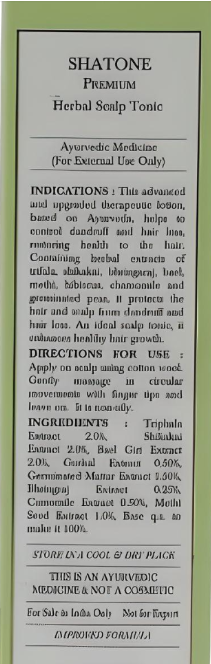

In [ ]:
#from google.colab.patches import cv2_imshow

img = Image.open('/content/ocr_repo/shatone-new.jpg')
display(img)

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 255 255 ... 255 255 255]
 [242 213 155 ...  95  94  95]
 [252 221 161 ...  99  98  99]
 ...
 [127 131 121 ... 129 147 235]
 [127 131 121 ... 129 150 237]
 [127 130 120 ... 129 152 239]]
Green =  [[255 255 255 ... 255 255 255]
 [242 219 170 ... 151 150 151]
 [252 228 177 ... 157 156 157]
 ...
 [179 187 174 ... 168 174 247]
 [179 187 174 ... 168 176 248]
 [179 186 173 ... 167 179 250]]
Red =  [[255 255 255 ... 255 255 255]
 [242 217 166 ... 135 136 137]
 [252 226 173 ... 140 141 142]
 ...
 [166 173 161 ... 157 166 243]
 [166 173 161 ... 157 169 245]
 [166 172 160 ... 156 171 247]]


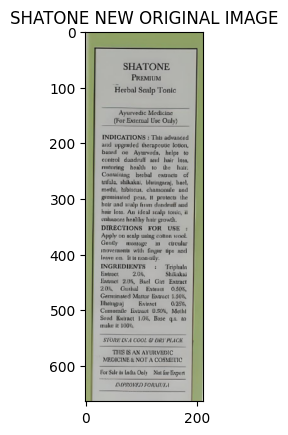

In [ ]:
# Plot original image

image = cv2.imread('/content/ocr_repo/shatone-new.jpg')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('SHATONE NEW ORIGINAL IMAGE')
plt.show()

In [ ]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
noise_removal = remove_noise(canny)
deskew

images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

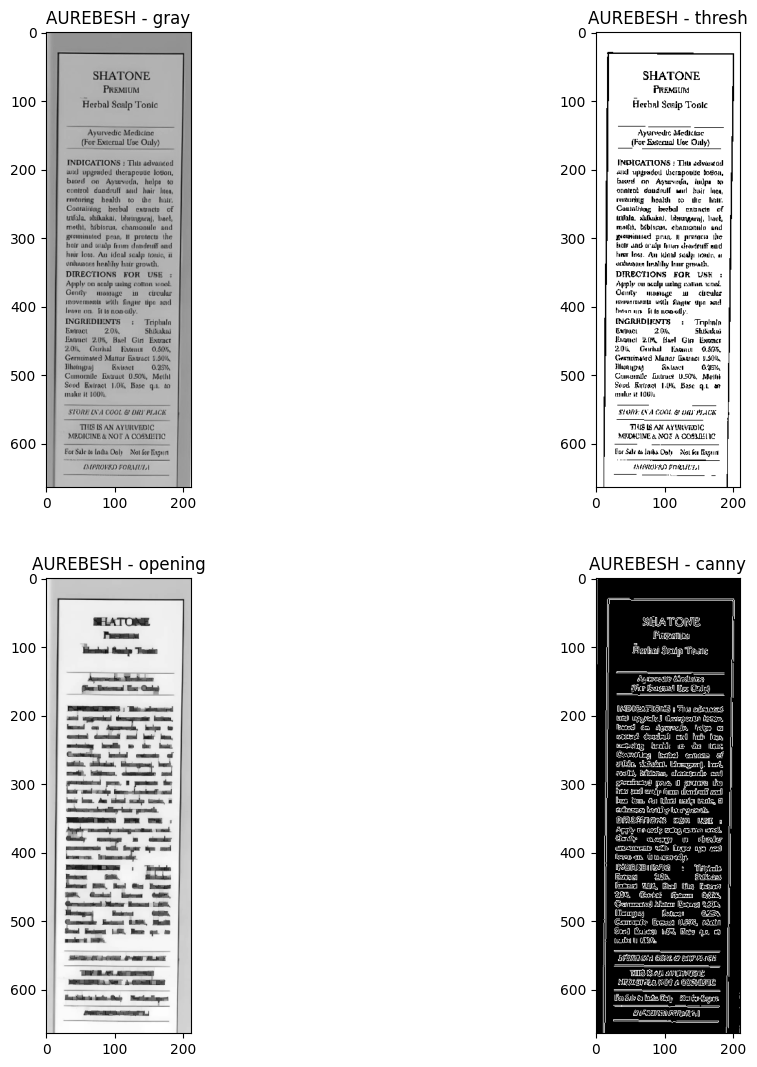

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('AUREBESH - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
SHATONE
Premium
Herbal Soalp Tonic
Ayurvedic Medicine

__ (For-Bxterual Use Only)
INDIGATIONS : This advoncod
‘with upgsmiod therspevue fovon,
bused on Aysrvoiin, hlpe «0
eonizot dondeufl sant hnir Ino,
rmnring bonis to the ols
Contaiting teebal extndis of
tela alata, Iningnen), ook,
moth, téblocan, chamooulo and
‘ptemintied pron. Mt protoce: the
hour und oa fines conde oud
hr Hoss, An idoal seal tonic, a
‘hime heal hair growth
DIRECTIONS FOR USE =
‘Apply 0 scalp sing conn ined
Goniy—mowoge im cirwulae
movermoais with fngue tips aad
lyn om. Bt woe
INGREDIENTS: Topinln
Beumot 20K Shika
Enmnot 208, Bast Gia Exner
204 Garhad Ensmin 050%,
Grenvinated Mamar Bxauet 1.0K
Thonn) — Brine — 2H
Cmormile Hnarwet 0.90%, Motht
Sood Finiroot 1.0% Base qu. to
rahe 1 100%
“STORI WA COOL DA LACK

‘THIS (8 AN AYURVEDIC
MEDICINE A NOF A CO#SIETIC
Foret Inds Oly Not birFignn

DNLPRONED FO

<hr>

# Example 2 : Receipt

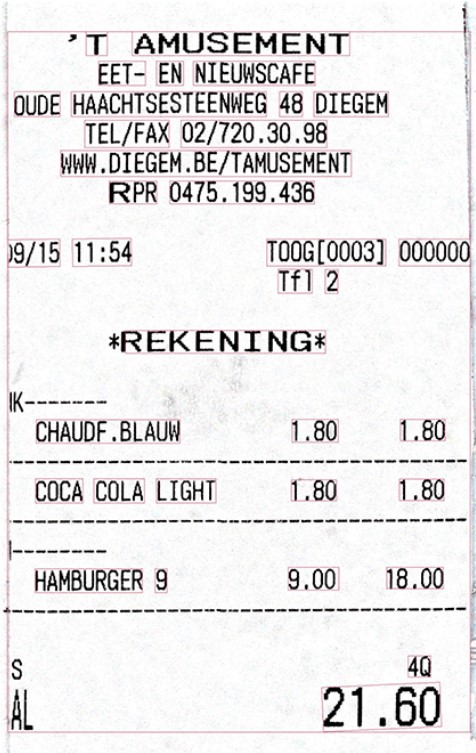

In [ ]:
#from google.colab.patches import cv2_imshow

img = Image.open('/content/ocr_repo/Receipt.jpg')
display(img)



### Preprocessing of images using OpenCV

We will write basic functions for different preprocessing methods
- grayscaling
- thresholding
- dilating
- eroding
- opening
- canny edge detection
- noise removal
- deskwing
- template matching.

Different methods can come in handy with different kinds of images.

In [ ]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [ ]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Blue =  [[255 251 255 ... 254 254 254]
 [254 254 255 ... 254 254 254]
 [254 255 255 ... 253 254 254]
 ...
 [254 254 252 ... 247 248 248]
 [255 255 253 ... 248 249 249]
 [254 255 252 ... 252 252 250]]
Green =  [[255 252 255 ... 253 254 254]
 [255 255 255 ... 254 254 254]
 [255 255 255 ... 254 255 255]
 ...
 [254 254 252 ... 252 253 254]
 [255 255 253 ... 253 254 255]
 [253 255 253 ... 254 254 255]]
Red =  [[254 250 254 ... 255 254 254]
 [253 253 254 ... 254 254 254]
 [253 254 254 ... 252 253 253]
 ...
 [254 254 252 ... 251 252 253]
 [255 255 253 ... 252 253 254]
 [255 255 251 ... 254 254 254]]


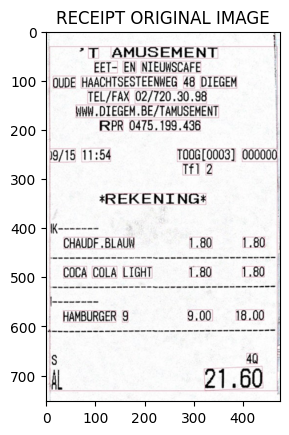

In [ ]:
# Plot original image

image = cv2.imread('/content/ocr_repo/Receipt.jpg')
b,g,r = cv2.split(image)
print("Blue = ", b)
print("Green = ", g)
print("Red = ", r)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.title('RECEIPT ORIGINAL IMAGE')
plt.show()

In [ ]:
# Preprocess image

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray,
          'thresh': thresh,
          'opening': opening,
          'canny': canny}

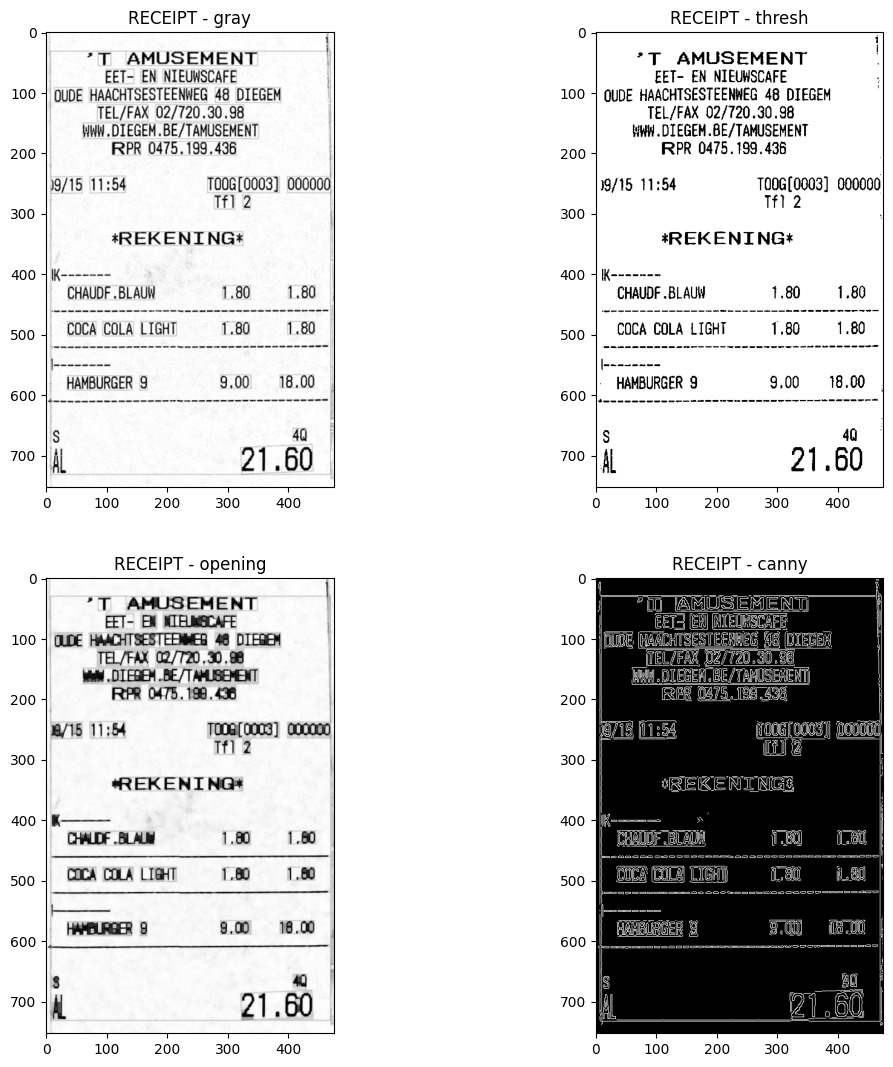

In [ ]:
# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('RECEIPT - ' + keys[i])
    plt.imshow(images[keys[i]], cmap='gray')

In [ ]:
# Get OCR output using Pytesseract

custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
1
>T AMUSEMENT
EET- EN NIEUWSCAFE {
QUDE HAACHTSESTEENWEG 48 DIEGEN
TEL/FAX 02/720.30.98
WWW, DIEGEM .BE/TAMUSEMENT
RPR 0475. 199.436
99/15 11:54 T00G{0003] 000000
Tf] 2
#REKENING#*
IK-------
CHAUDF .BLAUW 1.80 1.80
COCA COLA LIGHT 1.80 1,80
[ooo os
HAMBURGER 9 9.00 18.00
S 40
AL 21.60


-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
1
>T AMUSEMENT
EET- EN NIEUWSCAFE {
QUDE HAACHTSESTEENWEG 48 DIEGEN
TEL/FAX 02/720.30.98
WWW, DIEGEM .BE/TAMUSEMENT
RPR 0475. 199.436
99/15 11:54 T00G{0003] 000000
Tf] 2
#REKENING#*
IK-------
CHAUDF .BLAUW 1.80 1.80
COCA COLA LIGHT 1.80 1,80
[ooo os
HAMBURGER 9 9.00 18.00
S 40
AL 21.60


-----------------------------------------
TESSERACT OUTPUT --> OPENED IMAGE
-----------------------------------------
1
>T AMUSEMENT
EET- EN NIEUWSCAFE {
QUDE HAACHTSESTEENWEG 4

<hr>